# <span style="color: #16647A;">1 | Introduction</span>

<div style="background-color: #B4E3F1; color: gray; padding: 10px; border-radius: 15px;">

### 📘  Rice Variety Classification and Quality Evaluation Using Image Analysis

</div>

<span style="color: black;">
Rice is one of the most globally significant grain crops, characterized by its genetic diversity that leads to numerous distinct varieties. Each variety differs in crucial features like texture, shape, and color. By harnessing these unique characteristics, we can classify and evaluate the quality of rice seeds with high accuracy.

This project leverages <span style="color: #16647A; font-weight: bold;">Transfer Learning</span> with the <span style="color: #16647A; font-weight: bold;">MobileNetV2</span> architecture in Keras to create a classification model for identifying five specific rice varieties: <span style="color: #16647A; font-weight: bold;">Arborio, Basmati, Ipsala, Jasmine,</span> and <span style="color: #16647A; font-weight: bold;">Karacadag</span>. Using a comprehensive dataset with <span style="color: #16647A; font-weight: bold;">75,000 images</span> (15,000 for each variety), the model aims to classify rice types based on their visual features, providing insights valuable for seed selection and quality assessment.

By applying advanced <span style="color: #16647A; font-weight: bold;">machine learning</span> and <span style="color: #16647A; font-weight: bold;">deep neural networks</span>, this system aspires not only to enhance rice production and quality evaluation but also to support the broader fields of computer vision and pattern recognition. The findings here may serve as a foundation for automated classification and quality assessment across a range of agricultural products, contributing to innovations in agriculture and food quality control.

In summary, this Rice Variety Classification project demonstrates how image analysis can contribute to efficient rice classification and quality evaluation, benefiting agricultural practices and computer vision research in the food industry.
</span>

# <span style="color: #16647A;">2 | Import Library</span>

In [23]:
! pip install -q silence_tensorflow  
from silence_tensorflow import silence_tensorflow
silence_tensorflow()
import warnings
warnings.filterwarnings('ignore')
import os    
import time
import random                                            
import keras
import numpy as np  
import pandas as pd 
import seaborn as sns     
import tensorflow as tf 
from tabulate import tabulate
from termcolor import colored  
import matplotlib.pyplot as plt  
from IPython.display import display
from keras.models import Sequential
from keras import models, layers, optimizers
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
sns.set_style('whitegrid')
import patoolib
import splitfolders
import pathlib

# <span style="color: #16647A;">3 | Generate a DataFrame for Image Files and Their Labels</span>

In [25]:
# using patoolib to extract files. using the rar file inside your path.

patoolib.extract_archive("Rice_Image_Dataset.rar", outdir="Rice_Image_Dataset")

INFO patool: Extracting Rice_Image_Dataset.rar ...
INFO patool: ... creating output directory `Rice_Image_Dataset'.
INFO patool: running "C:\Program Files\WinRAR\rar.EXE" x -kb -or -- C:\Users\shara\IMT\Rice_Image_Dataset.rar
INFO patool: ... Rice_Image_Dataset.rar extracted to `Rice_Image_Dataset'.


'Rice_Image_Dataset'

In [30]:
#  dont need to right the path folder here. just write the folder name, BECAUSE YOU ARE INSIDE THE PATH

dir1 = 'Rice_Image_Dataset'

splitfolders.ratio(

    input=dir1, output='imgs', seed=42, ratio=(0.7, 0.15, 0.15))

# Path of splited sets

dir2 = 'imgs'

dir2 = pathlib.Path(dir2)


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:01,  1.66s/ files]
Copying files: 109 files [00:01, 84.90 files/s]
Copying files: 192 files [00:01, 159.34 files/s]
Copying files: 304 files [00:01, 274.63 files/s]
Copying files: 402 files [00:02, 378.01 files/s]
Copying files: 514 files [00:02, 496.61 files/s]
Copying files: 605 files [00:02, 576.66 files/s]
Copying files: 712 files [00:02, 662.02 files/s]
Copying files: 803 files [00:02, 648.42 files/s]
Copying files: 889 files [00:02, 695.80 files/s]
Copying files: 985 files [00:02, 755.65 files/s]
Copying files: 1097 files [00:02, 817.14 files/s]
Copying files: 1187 files [00:02, 836.65 files/s]
Copying files: 1291 files [00:03, 855.91 files/s]
Copying files: 1387 files [00:03, 880.08 files/s]
Copying files: 1478 files [00:03, 887.42 files/s]
Copying files: 1580 files [00:03, 885.82 files/s]
Copying files: 1674 files [00:03, 900.92 files/s]
Copying files: 1794 files [00:03, 942.27 files/s]
Copying files: 1893 fi

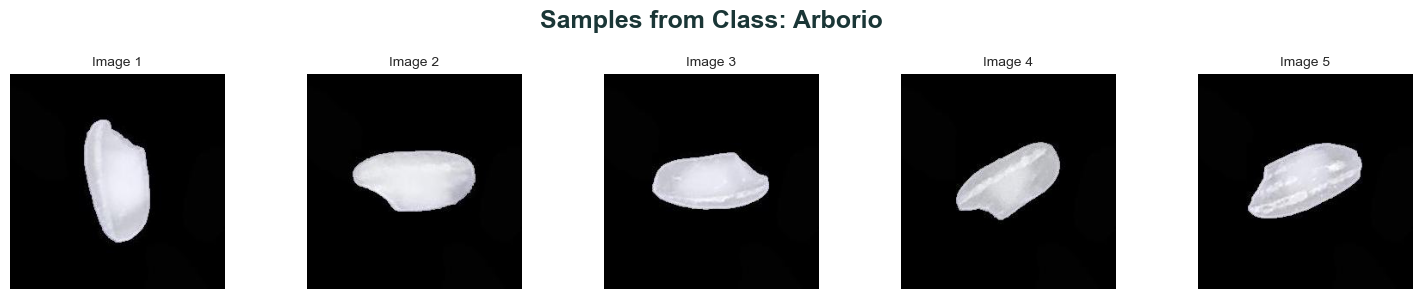

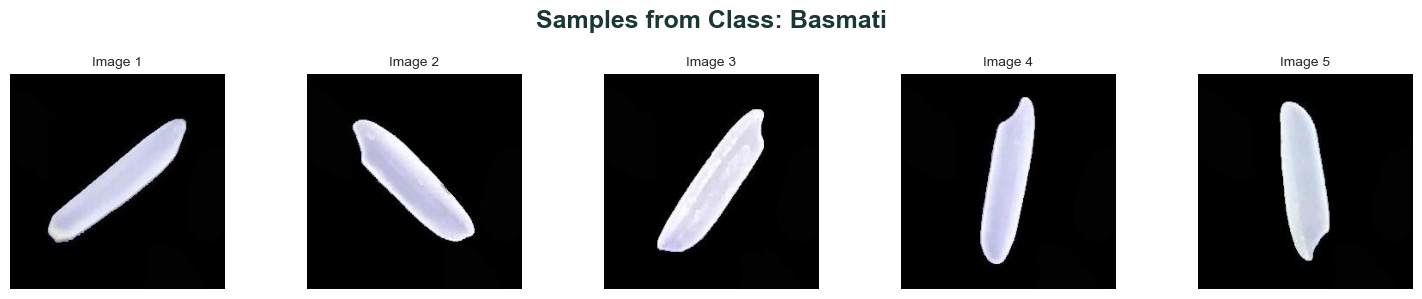

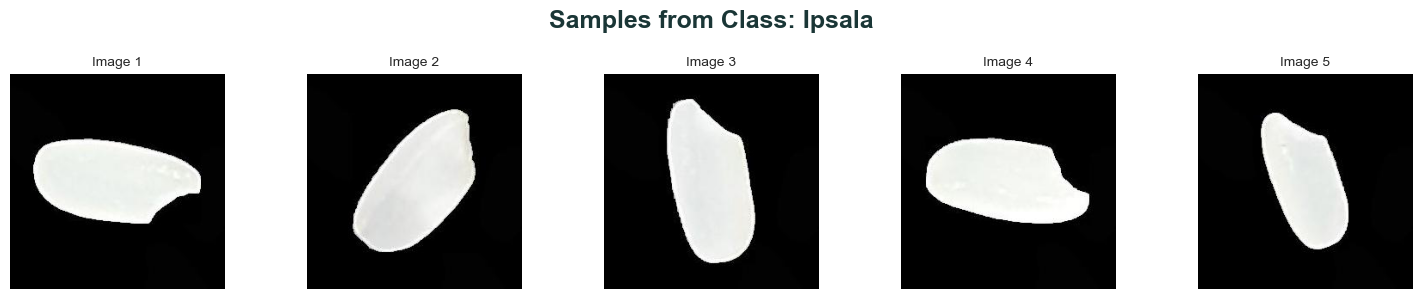

Copying files: 124087 files [16:47, 123.21 files/s]


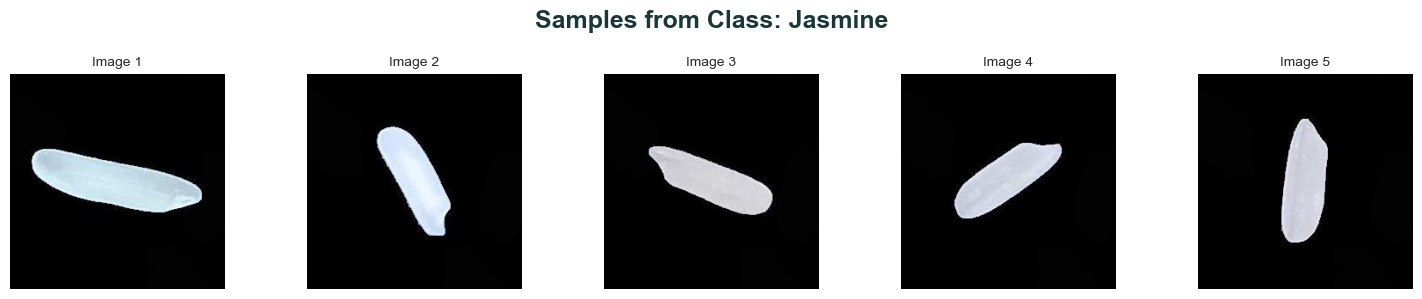

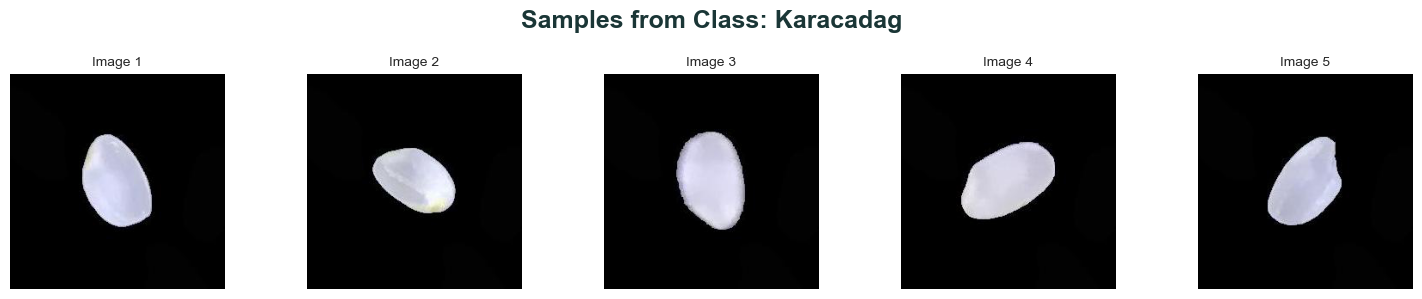

In [38]:


# Assuming the data directory is stored in 'dir1'
dir1 = 'Rice_Image_Dataset'

# List all folders (classes) in the data directory
detection = os.listdir(dir1)

# Plot and Count Images
for class_name in detection:
    # Prepare the path for each class
    class_path = os.path.join(dir1, class_name)
    
    # List all images in the class folder
    images = os.listdir(class_path)
    
    # Randomly select 5 images
    random_images = random.choices(images, k=5)

    # Create a figure with improved aesthetics
    fig, ax = plt.subplots(1, 5, figsize=(15, 3))
    plt.suptitle(f'Samples from Class: {class_name}', fontsize=18, fontweight='bold', color='#1A3636')

    for i in range(5):
        # Load and display the image
        img_path = os.path.join(class_path, random_images[i])
        img = keras.utils.load_img(img_path)
        ax[i].imshow(img)
        ax[i].axis('off')  # Remove axes

        # Optionally, add image title
        ax[i].set_title(f'Image {i + 1}', fontsize=10)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
    plt.show()  # Display the figure


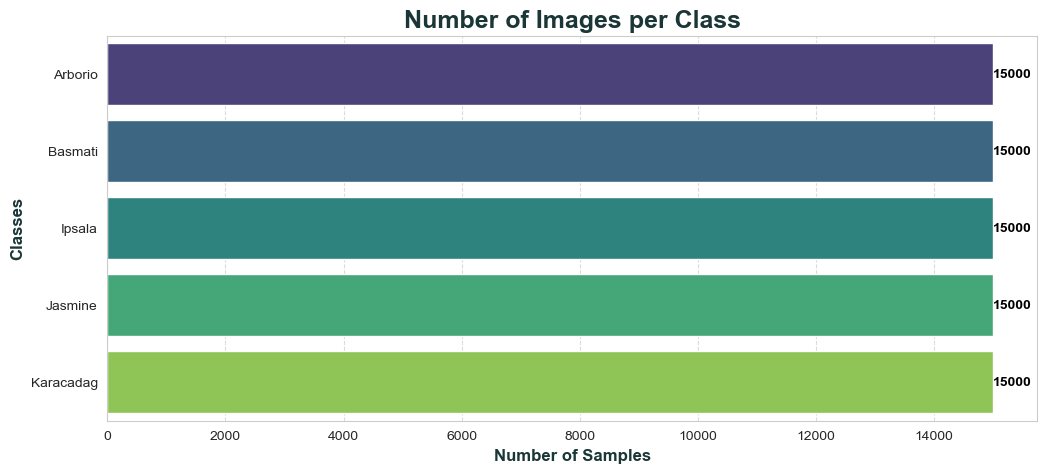

In [51]:
# List all folders (classes) in the data directory
detection = os.listdir(dir1)

# Initialize a dictionary to store the class names and their corresponding counts
class_counts = {}

# Loop through each class and count the number of images
for class_name in detection:
    class_path = os.path.join(dir1, class_name)
    # Count the images in each class
    class_counts[class_name] = len([img for img in os.listdir(class_path) if img.endswith(('.jpg', '.png', '.jpeg'))])

# Sort the dictionary based on the counts in descending order
sorted_classes = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
class_names, counts = zip(*sorted_classes)

# Plot the bar chart
plt.figure(figsize=(12, 5))
palette = sns.color_palette("viridis", len(counts))  # Using a different color palette

# Create a barplot
ax = sns.barplot(x=counts, y=class_names, palette=palette)

# Annotate each bar with the count
for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height()/2.,
            '{}'.format(counts[i]),
            va="center", fontsize=10, color='black', fontweight='bold')

# Set plot title
plt.title('Number of Images per Class', fontsize=18, fontweight='bold', color='#1A3636')
# Set Y-axis label
plt.ylabel('Classes', fontsize=12, fontweight='bold', color='#1A3636')

# Set X-axis label
plt.xlabel('Number of Samples', fontsize=12, fontweight='bold', color='#1A3636')

# Customize grid and background
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [85]:
# Create a list of tuples that contain image paths and their class labels
image_data = []  # Initialize an empty list for storing image paths and labels

# Iterate through each class in the detection
for class_name in detection:
    class_path = os.path.join(dir1, class_name)  # Create the path for the class
    files = os.listdir(class_path)  # List all files in the class folder
    
    # Loop through all files and add their paths and class labels to the image_data list
    for file in files:
        file_path = os.path.join(class_path, file)  # Create the full file path
        image_data.append((file_path, class_name))  # Append tuple to the list

# Convert the list to a pandas DataFrame
df = pd.DataFrame(image_data, columns=['path', 'label'])

# Shuffle the DataFrame rows for randomness
df = df.sample(frac=1).reset_index(drop=True)

# Display the first few entries of the DataFrame
display(df.head())  # Change from print to display

,path,label
0,Rice_Image_Dataset\Ipsala\Ipsala (4062).jpg,Ipsala
1,Rice_Image_Dataset\Ipsala\Ipsala (973).jpg,Ipsala
2,Rice_Image_Dataset\Jasmine\Jasmine (1221).jpg,Jasmine
3,Rice_Image_Dataset\Karacadag\Karacadag (11252)...,Karacadag
4,Rice_Image_Dataset\Karacadag\Karacadag (6004).jpg,Karacadag


In [87]:
total_samples = len(df)
print(colored(f'Total number of samples: {total_samples}', 'green', attrs=['underline']))

training_data = df[:60000]
validation_data = df[60000:67500]
test_data = df[67500:]

training_data.reset_index(inplace=True, drop=True)
validation_data.reset_index(inplace=True, drop=True)
test_data.reset_index(inplace=True, drop=True)

print(colored(f'Number of samples in Training df: {len(training_data)}', attrs=['bold']))
print(colored(f'Number of samples in Validation df: {len(validation_data)}', attrs=['bold']))
print(colored(f'Number of samples in Test df: {len(test_data)}', attrs=['bold']))

Total number of samples: 75000
Number of samples in Training df: 60000
Number of samples in Validation df: 7500
Number of samples in Test df: 7500


# <span style="color: #16647A;">4 | Data Generator, Normalization & Modeling</span>

</div>

<span style="color: black;">
<span style="color: #16647A; font-weight: bold;">  
    
Setting Image Dimensions and Batch Size: </span>
    
The image dimensions are set to 224x224 pixels, and the batch size is configured to 16.

<span style="color: #16647A; font-weight: bold;">Initializing the ImageDataGenerator for Normalization:</span>


The ImageDataGeneratoris initialized with normalization applied to the images using the rescale=1.0/255 parameter. This step scales the pixel values from the range of [0, 255] to [0, 1], which is essential for the model's performance and stability.

<span style="color: #16647A; font-weight: bold;">Creating Data Generators:</span>

The function create_data_generator is defined to generate data from a DataFrame. It takes the DataFrame and a boolean flag indicating whether the generator is for training data. The generator uses the flow_from_dataframe method to load images based on specified file paths (x_col='path') and labels (y_col='label'). The images are resized to the target size, batched accordingly, and categorized using class_mode='categorical'. The shuffle parameter is set to true for training data to ensure randomization.

Generators for Training, Validation, and Test Datasets
Three data generators are created: train_generator for the training dataset, valid_generator for the validation dataset, and test_generator for the test dataset. The training generator is shuffled, while the validation and test generators maintain a consistent order

<span style="color: #16647A; font-weight: bold;">Defining the Model Input Shape:</span>

The input shape for the model is set to (224, 224, 3), representing the dimensions of the input images.

<span style="color: #16647A; font-weight: bold;">Building the Custom CNN Model:</span>

A sequential model is constructed using convolutional, max pooling, and fully connected layers. The model architecture includes:

A convolutional layer with 32 filters of size 3x3, followed by batch normalization and a max pooling layer.
Another convolutional layer with 64 filters, followed by batch normalization and another max pooling layer.
After flattening the output, two dense layers with 512 and 64 units are added, each followed by dropout layers for regularization. The final output layer has a softmax activation function, corresponding to the number of unique classes in the training data.

<span style="color: #16647A; font-weight: bold;">Compiling the Model:</span>
                                                                         
The model is compiled using the categorical crossentropy loss function, Adadelta optimizer with a learning rate of 0.01, and accuracy as the evaluation metric.

<span style="color: #16647A; font-weight: bold;"> Model Summary: </span>

A summary of the model architecture is displayed, providing an overview of the layers and parameters.
</span>


In [93]:
# Set image dimensions and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16

# Initialize the ImageDataGenerator for image normalization
data_gen = ImageDataGenerator(rescale=1.0/255)

# Function to create data generators
def create_data_generator(dataframe, is_training=False):
    return data_gen.flow_from_dataframe(
        dataframe,
        x_col='path',
        y_col='label',
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=is_training)
# Create generators for training, validation, and test datasets
train_generator = create_data_generator(training_data, is_training=True)
valid_generator = create_data_generator(validation_data, is_training=False)
test_generator = create_data_generator(test_data, is_training=False)

# Set the input shape of the model
input_shape = (224, 224, 3)

# Build the custom CNN model
model = Sequential()

# Convolutional and MaxPooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))  # Convolutional layer with 32 filters of size 3x3
model.add(BatchNormalization())  # Normalizes the output of the previous layer
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling layer to reduce dimensions

model.add(Conv2D(64, (3, 3), activation='relu'))  # Another convolutional layer with 64 filters
model.add(BatchNormalization())  # Normalize again
model.add(MaxPooling2D(pool_size=(2, 2)))  # Another max pooling layer

# Flatten the output and add Dense layers
model.add(Flatten())  # Converts the 2D matrix to a 1D vector
model.add(Dense(512, activation='relu'))  # Fully connected layer with 512 units
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(64, activation='relu'))  # Another dense layer with 64 units
model.add(Dropout(0.5))  # Another dropout layer
model.add(Dense(len(training_data['label'].unique()), activation='softmax'))  # Output layer for the number of classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adadelta(learning_rate=0.01), metrics=['accuracy'])

# Summary of the model
model.summary()

print("Custom CNN model is built and ready for training!")

Found 60000 validated image filenames belonging to 5 classes.
Found 7500 validated image filenames belonging to 5 classes.
Found 7500 validated image filenames belonging to 5 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    95,552,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,604,933 (364.70 MB)

 Trainable params: 95,604,741 (364.70 MB)

 Non-trainable params: 192 (768.00 B)

Custom CNN model is built and ready for training!


In [95]:
# Model Checkpoint Callback to save the best model parameters as a .keras file
checkpoint_callback = keras.callbacks.ModelCheckpoint('BestModel.keras', save_best_only=True)

# ReduceLROnPlateau Callback to decrease the learning rate based on the 'monitor' parameter after a specified 'patience' period if no improvement is observed
reduce_learning_rate = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [97]:
# Model Training
numepochs = 5

# Start the timer
start_time = time.time()

history = model.fit(train_generator, epochs=numepochs, validation_data=test_generator,
                    callbacks=[checkpoint_callback, reduce_learning_rate])

# Stop the timer
end_time = time.time()

# Calculate and print the total training time
training_time = end_time - start_time
print(f"\nTotal training time: {training_time:.2f} seconds")

Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10086s 3s/step - accuracy: 0.7716 - loss: 0.6554 - val_accuracy: 0.9873 - val_loss: 0.0403 - learning_rate: 0.0100
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9825s 3s/step - accuracy: 0.9569 - loss: 0.1370 - val_accuracy: 0.9917 - val_loss: 0.0312 - learning_rate: 0.0100
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9792s 3s/step - accuracy: 0.9731 - loss: 0.0946 - val_accuracy: 0.9920 - val_loss: 0.0339 - learning_rate: 0.0100
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10433s 3s/step - accuracy: 0.9788 - loss: 0.0776 - val_accuracy: 0.9928 - val_loss: 0.0380 - learning_rate: 0.0100
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 13132s 4s/step - accuracy: 0.9807 - loss: 0.0718 - val_accuracy: 0.9928 - val_loss: 0.0374 - learning_rate: 0.0100

Total training time: 53269.23 seconds


In [103]:
# Convert result of training to a df
result_df = pd.DataFrame(history.history)
print(tabulate(result_df, headers='keys', tablefmt='psql'))

+----+------------+-----------+----------------+------------+-----------------+
|    |   accuracy |      loss |   val_accuracy |   val_loss |   learning_rate |
|----+------------+-----------+----------------+------------+-----------------|
|  0 |   0.871417 | 0.365311  |       0.987333 |  0.0402726 |            0.01 |
|  1 |   0.962317 | 0.120579  |       0.991733 |  0.0311833 |            0.01 |
|  2 |   0.97405  | 0.092643  |       0.992    |  0.0338952 |            0.01 |
|  3 |   0.978483 | 0.0778454 |       0.9928   |  0.0380299 |            0.01 |
|  4 |   0.980767 | 0.072836  |       0.9928   |  0.0373959 |            0.01 |
+----+------------+-----------+----------------+------------+-----------------+


# <span style="color: #16647A;"> 5| Evaluation</span>

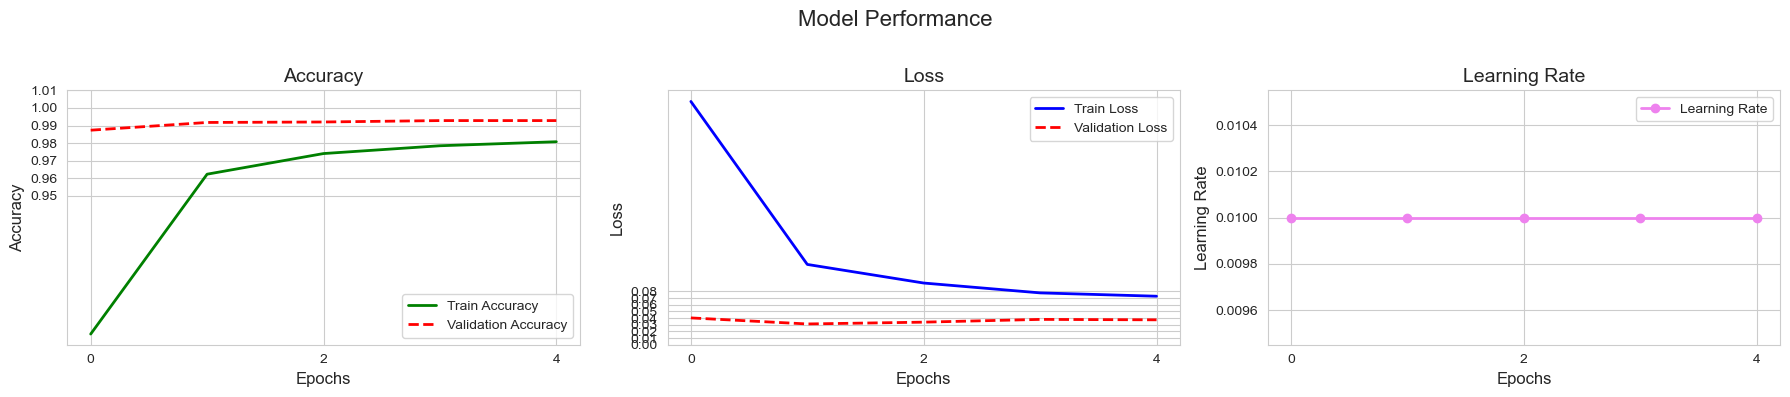

In [109]:
# Define a X variable to store range of epochs
x = np.arange(len(result_df))

# Initialize figure and axes for side-by-side plots
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
fig.suptitle('Model Performance', fontsize=16)

# ax[0] ---> Accuracy
ax[0].plot(x, result_df.accuracy, label='Train Accuracy', linewidth=2, color='green')
ax[0].plot(x, result_df.val_accuracy, label='Validation Accuracy', linewidth=2, linestyle='--', color='red')
ax[0].set_title('Accuracy', fontsize=14)
ax[0].set_yticks(np.arange(0.95, 1.01, 0.01))
ax[0].set_xticks(np.arange(0, len(result_df), 2))
ax[0].set_xlabel('Epochs', fontsize=12)
ax[0].set_ylabel('Accuracy', fontsize=12)
ax[0].legend()
ax[0].grid(True)

# ax[1] ---> Loss
ax[1].plot(x, result_df.loss, label='Train Loss', linewidth=2, color='blue')
ax[1].plot(x, result_df.val_loss, label='Validation Loss', linewidth=2, linestyle='--', color='red')
ax[1].set_title('Loss', fontsize=14)
ax[1].set_xticks(np.arange(0, len(result_df), 2))
ax[1].set_yticks(np.arange(0, 0.085, 0.01))
ax[1].set_xlabel('Epochs', fontsize=12)
ax[1].set_ylabel('Loss', fontsize=12)
ax[1].legend()
ax[1].grid(True)

# ax[2] ---> Learning Rate
ax[2].plot(x, result_df.learning_rate, label='Learning Rate', linewidth=2, marker='o', color='violet')
ax[2].set_title('Learning Rate', fontsize=14)
ax[2].set_xticks(np.arange(0, len(result_df), 2))
ax[2].set_xlabel('Epochs', fontsize=12)
ax[2].set_ylabel('Learning Rate', fontsize=12)
ax[2].legend()
ax[2].grid(True)

# Adjust layout to make room for the super title
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

In [111]:
# Load the optimal model weights saved in "BestModel.keras" after training
best_model = keras.models.load_model('BestModel.keras')

# Evaluate the model's performance on the test dataset
loss, accuracy = best_model.evaluate(test_generator)

# Display the evaluation results with clear and formatted output
print("\nModel Evaluation Results:")
print(colored(f'Loss: {loss:.5f}',attrs=['bold']))
print(colored(f'Accuracy: {accuracy * 100:.2f}%',attrs=['bold']))

469/469 ━━━━━━━━━━━━━━━━━━━━ 116s 243ms/step - accuracy: 0.9904 - loss: 0.0306

Model Evaluation Results:
Loss: 0.03118
Accuracy: 99.17%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


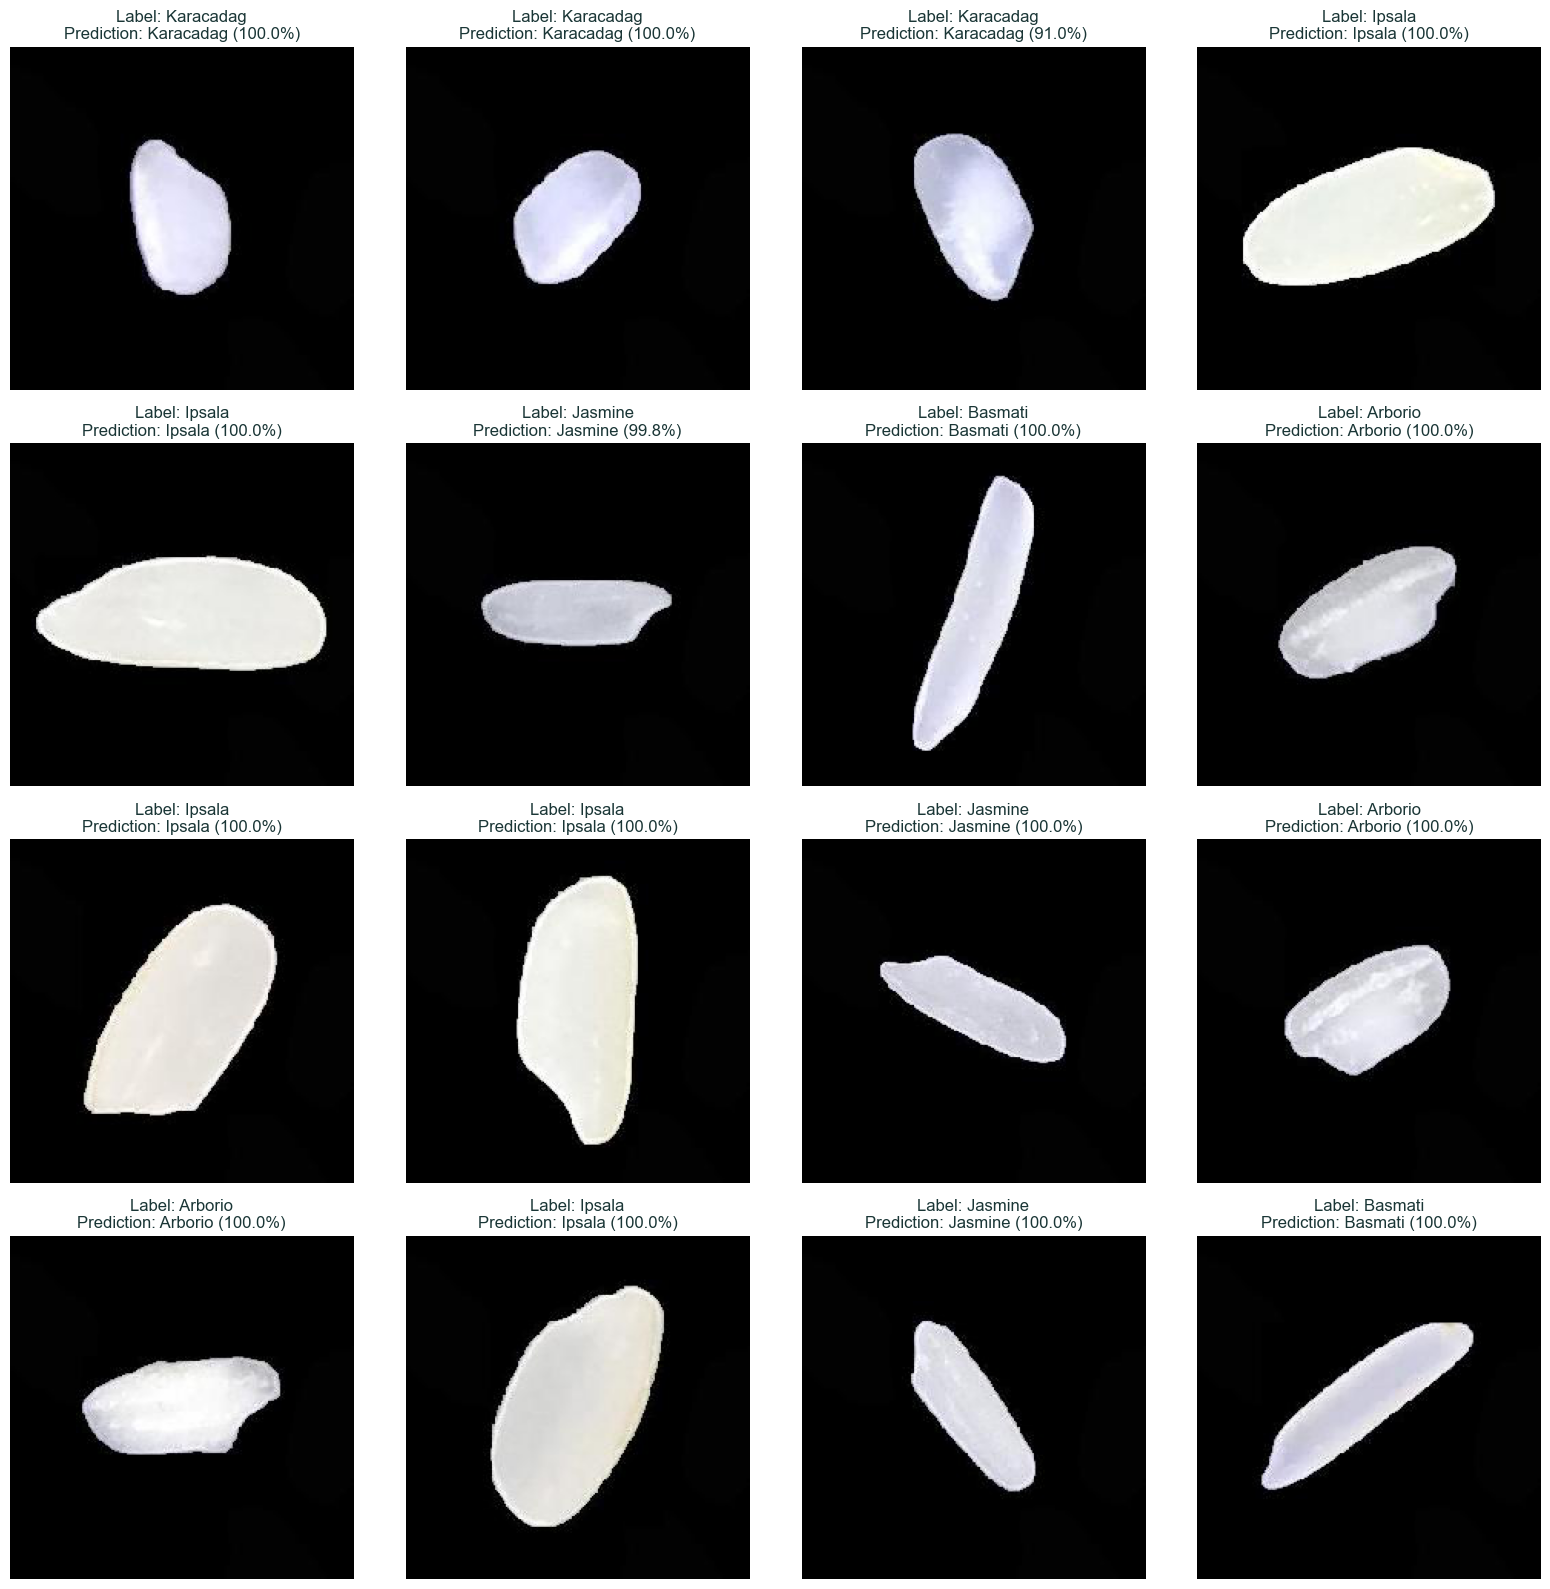

In [115]:
# Reset the test data generator to start from the beginning.
test_generator.reset()

# Get the next batch of images and their corresponding labels from the test generator.
img, label = next(test_generator)

# Generate predictions for the batch of images using the trained model.
predictions = model.predict(img)

# Extract the predicted classes from the model's output.
test_pred_classes = np.argmax(predictions, axis=1)

# Set up the plot with a larger figure size for better clarity.
plt.figure(figsize=[16, 16])

# Loop through the first 16 images in the batch to display them along with their labels and predictions.
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(img[i])
    plt.axis('off')  # Hide the axes for a cleaner look

    # Title with the true label, predicted class, and prediction confidence percentage
    plt.title(f"Label: {detection[np.argmax(label[i])]}\n"
              f"Prediction: {detection[test_pred_classes[i]]} "
              f"({100 * np.max(predictions[i]):.1f}%)",
              fontsize=12, color='#1A3636')

# Adjust the layout to prevent overlapping of elements
plt.tight_layout()
plt.show()

In [116]:
# Generate predictions on the test set
print("Generating predictions on the test set...")
y_pred = model.predict(test_generator, verbose=1)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
print("\nClassification Report:")
clf = classification_report(test_generator.classes, y_pred_classes, target_names=detection)

# Print the classification report with some formatting
print("="*50)
print("Detailed Classification Report")
print("="*50)
print(clf)
print("="*50)

Generating predictions on the test set...
469/469 ━━━━━━━━━━━━━━━━━━━━ 108s 230ms/step

Classification Report:
Detailed Classification Report
              precision    recall  f1-score   support

     Arborio       0.99      0.99      0.99      1532
     Basmati       1.00      0.99      0.99      1471
      Ipsala       1.00      1.00      1.00      1491
     Jasmine       0.99      0.99      0.99      1504
   Karacadag       1.00      0.99      0.99      1502

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500



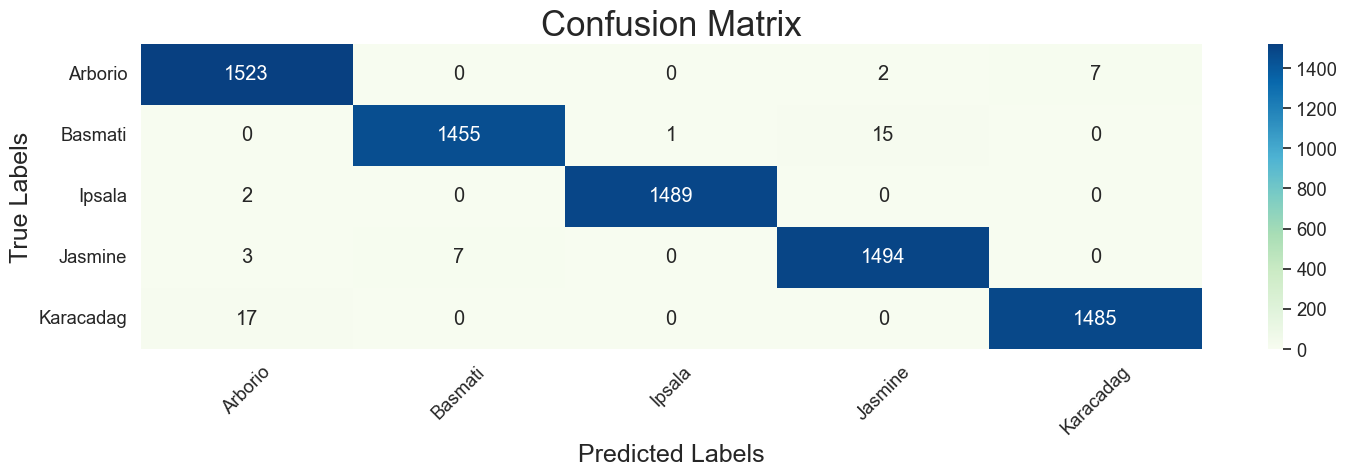

In [117]:
def plot_confusion_matrix(y_true, y_pred):
    """Plot the confusion matrix for the classification results."""
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Set up the figure
    plt.figure(figsize=(15, 5))
    sns.set(font_scale=1.2)  # Increase font size for better readability
    
    # Create heatmap for the confusion matrix
    ax = sns.heatmap(cm, annot=True, fmt='g', cmap="GnBu", cbar=True)
    
    # Set labels and title
    ax.set_xlabel('Predicted Labels', fontsize=18)
    ax.set_ylabel('True Labels', fontsize=18)
    ax.set_title('Confusion Matrix', fontsize=25)
    
    # Set tick labels
    ax.xaxis.set_ticklabels(detection, rotation=45)
    ax.yaxis.set_ticklabels(detection, rotation=0)

    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

# Call the function to plot the confusion matrix
plot_confusion_matrix(test_generator.classes, y_pred_classes)

</div>

<span style="color: black;">
<span style="color: #16647A; font-weight: bold;">  
    
The confusion matrix above highlights several key elements in the evaluation of the classification model:</span>

*True Positives (TP): The number of instances correctly classified as belonging to a certain class.<br>
*True Negatives (TN): The number of instances correctly classified as not belonging to a certain class.<br>
*False Positives (FP): The number of instances incorrectly classified as belonging to a certain class when they do not.<br>
*False Negatives (FN): The number of instances incorrectly classified as not belonging to a certain class when they actually do.<br>
From the confusion matrix, we can observe the model's ability to correctly predict classes (high TP and TN) and identify areas where the model may struggle, as indicated by the FP and FN values. This analysis provides a clear understanding of the model's performance across different classes.

